In [52]:
import bs4
import pandas as pd
from urllib import request
import re
import matplotlib.pyplot as plt
import numpy as np
import ast
import seaborn as sns
import statistics


In [2]:
df_series=pd.read_csv('C:/Users/Jean-Baptiste/OneDrive/ENSAE/projet_python_data_final.csv')

In [3]:
df_series.drop(columns=['Unnamed: 0'], inplace=True)

# Premières statistiques, répartition des notes

On commence par s'intéresser à la distribution des notes

In [4]:
df_series

,Nom,Note,Auteur,Genre,Nombre de saisons,Plateforme,Durée,Date de sortie,Mois,Année
0,Sherlock,8.1,Série de Mark Gatiss et Steven Moffat,"['policier', 'drame', 'thriller']",5.0,BBC One,90.0,"['25', 'juillet', '2010']",juillet,2010
1,The Walking Dead,6.7,Série de Frank Darabont,"['épouvante-horreur', 'drame']",10.0,AMC,43.0,"['11', 'octobre', '2010']",octobre,2010
2,Boardwalk Empire,7.6,Série de Terence Winter,['drame'],5.0,HBO,60.0,"['19', 'septembre', '2010']",septembre,2010
3,Luther,7.6,Série de Neil Cross,"['policier', 'drame']",5.0,BBC One,60.0,"['4', 'mai', '2010']",mai,2010
4,Band of Brothers : L'enfer du Pacifique,7.5,Série de Bruce McKenna,"['mini-série', 'drame', 'guerre']",1.0,HBO,50.0,"['14', 'mars', '2010']",mars,2010
5,Downton Abbey,7.6,Série de Julian Fellowes,['drame'],6.0,ITV,60.0,"['26', 'septembre', '2010']",septembre,2010
6,Spartacus,6.7,Série de Steven S. DeKnight,"['action', 'drame', 'historique']",3.0,Starz,60.0,"['22', 'janvier', '2010']",janvier,2010
7,Game of Thrones,8.2,Série de David Benioff et D.B. Weiss,"['aventure', 'drame', 'fantasy']",8.0,HBO,52.0,"['5', 'décembre', '2010']",décembre,2010
8,Treme,8.1,Série de David Simon et Eric Overmyer,['drame'],4.0,HBO,60.0,"['11', 'avril', '2010']",avril,2010
9,Justified,7.2,Série de Graham Yost,"['policier', 'drame', 'action']",6.0,FX,45.0,"['16', 'mars', '2010']",mars,2010


In [5]:
df_series['Genre']=df_series['Genre'].apply(ast.literal_eval)

<Figure size 432x288 with 0 Axes>

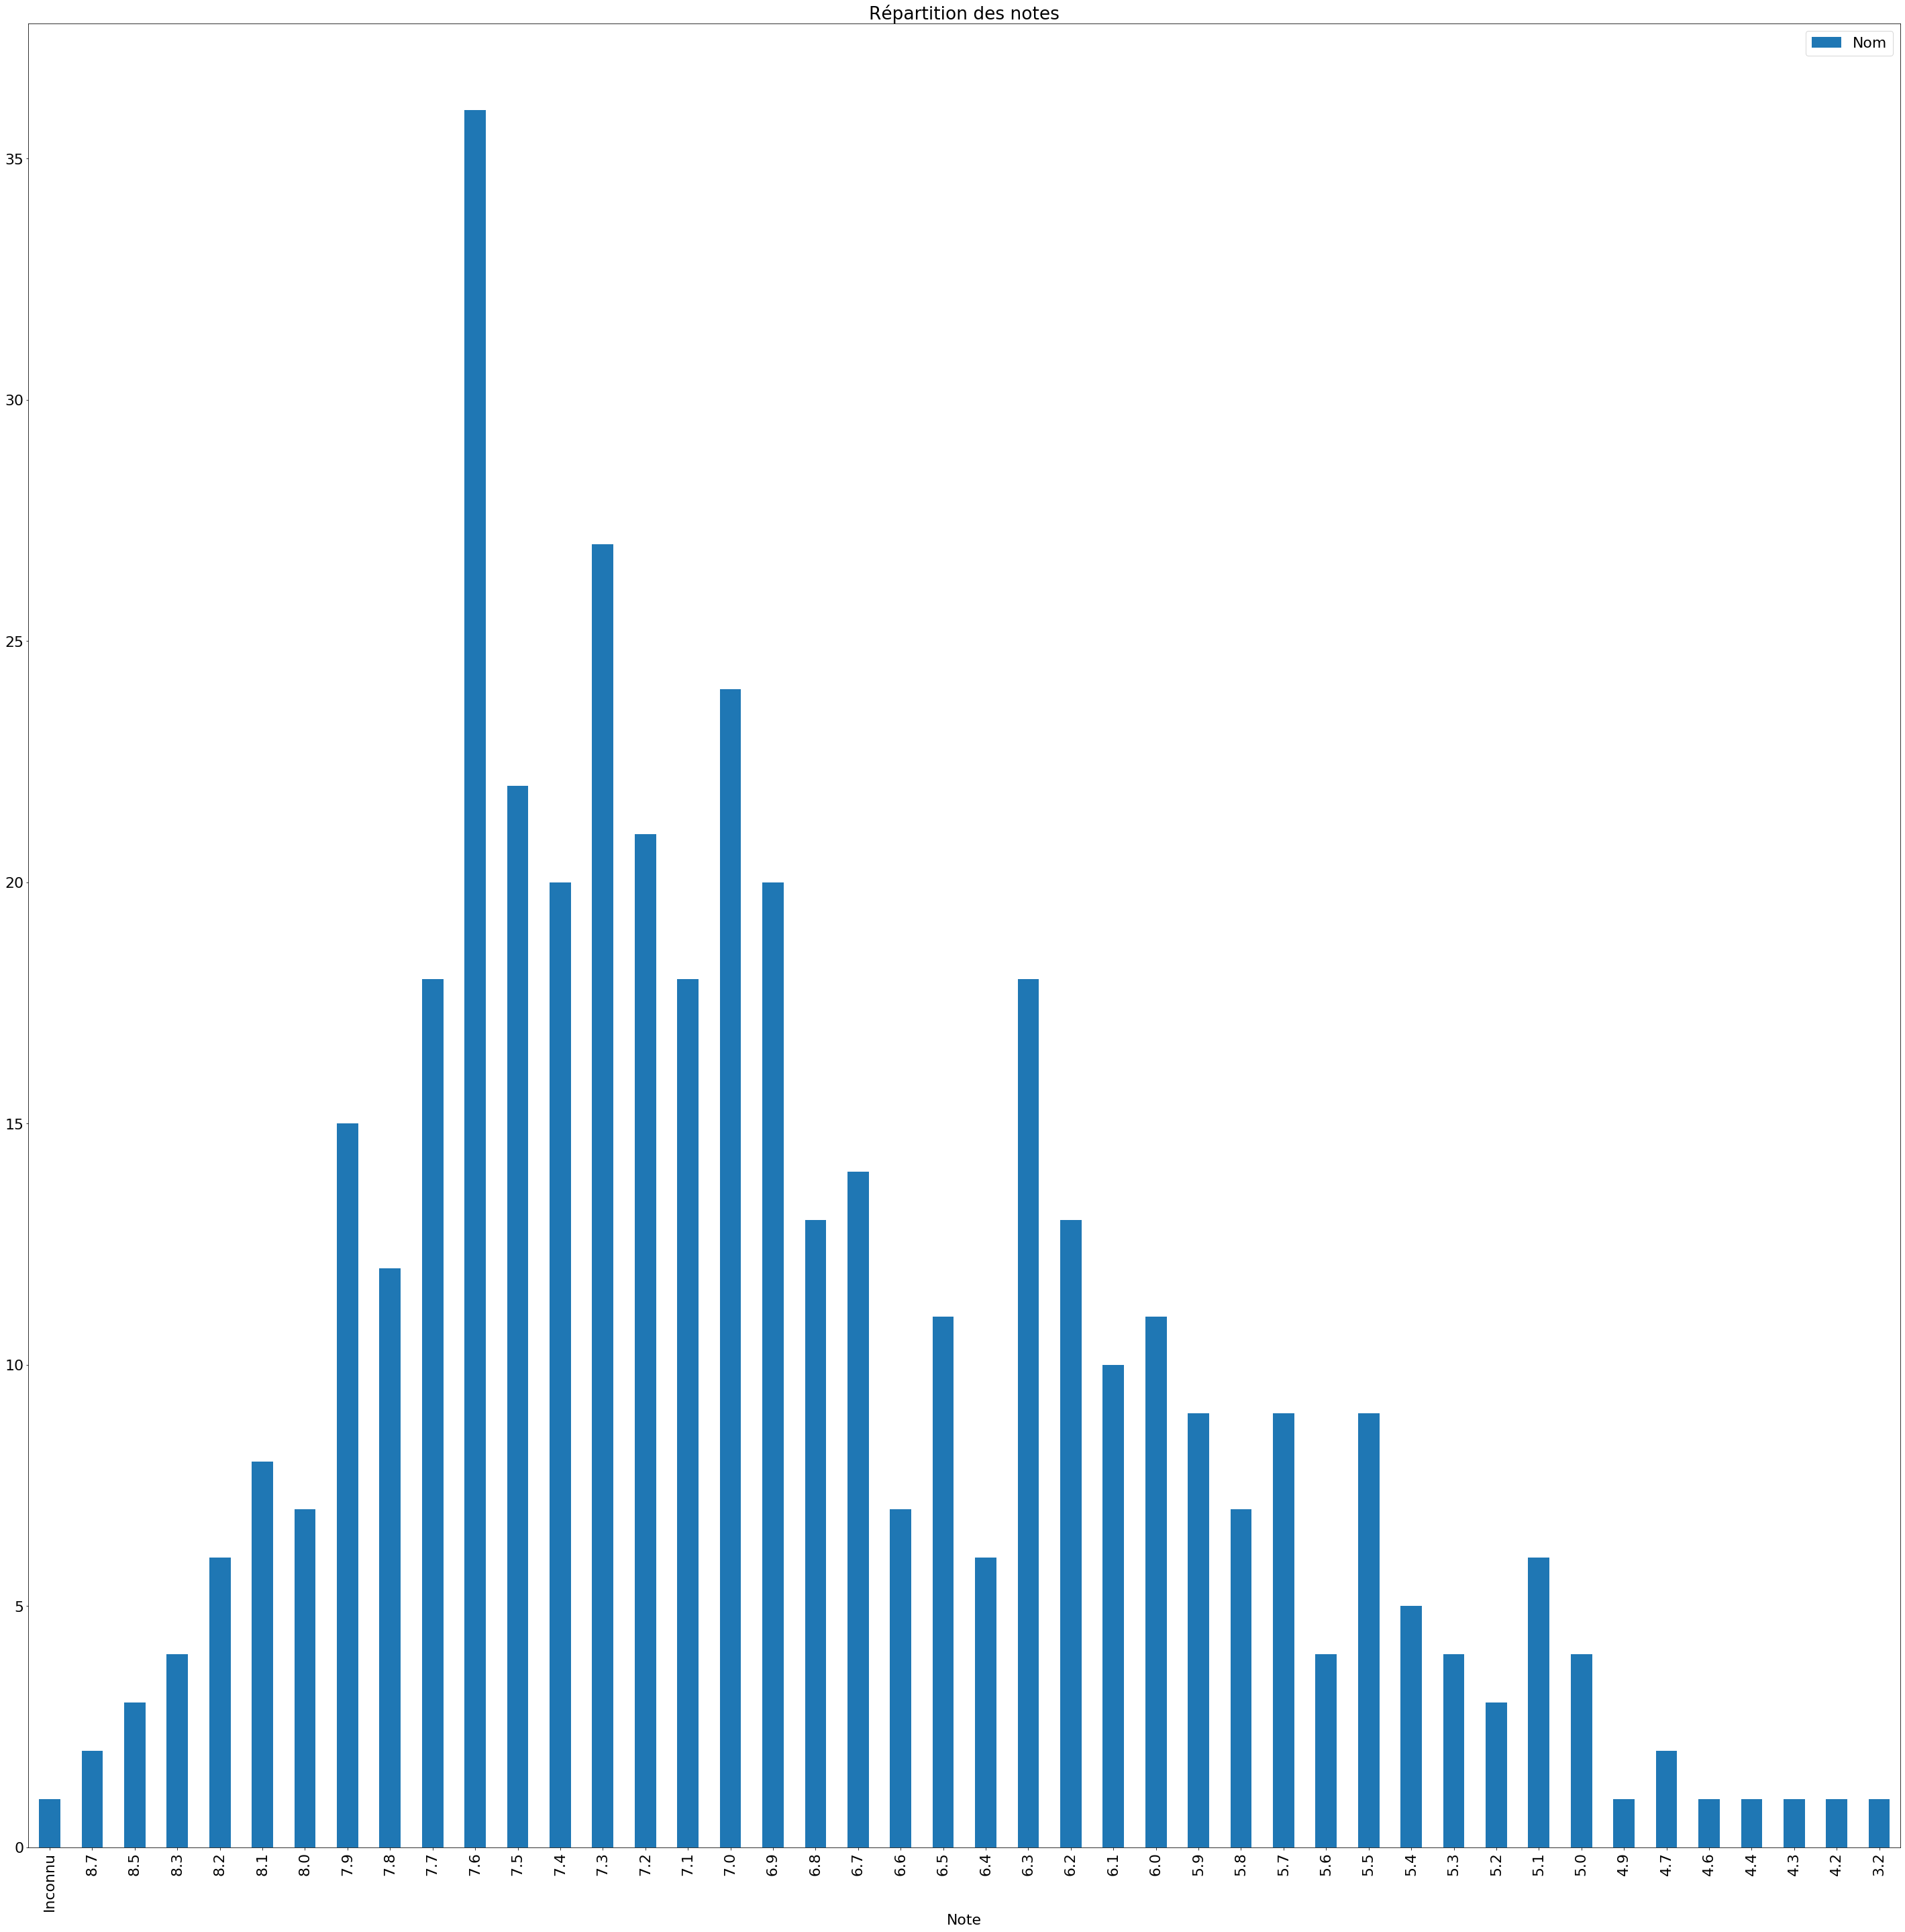

In [6]:
df1 = df_series.groupby('Note').agg({'Nom': "count"}).sort_values('Note', ascending = False)
plt.figure()
plt.rcParams.update({'font.size': 22}) 
df1.plot(kind="bar", figsize = (50,50), title="Répartition des notes")

Là dessus, on voit que la distribution des notes de l'échantillon est plutôt centré sur les notes entre 7 et 8, ce qui est plutôt normal venant des 100/50 meilleures séries de leur année. 
Cependant, comme ces classements se basent sur les votes des utilisateurs de SensCritique, et non pas sur les notes moyennes, on trouve également des séries moyennement voire mal appréciées (avec des notes moyennes en dessous de 5.5, ce qui les rend plutôt décevantes pour la plupart des personnes les ayant visionnées).

Comme il n'y a qu'une seule série sans moyenne ('Inconnu'), on peut l'éliminer de l'échantillon, et faire des statistiques descriptives sur celui-ci.

In [7]:
def row_value(df, column, value):
    L=[]
    for k in range(len(df)):
        if df.loc[k,column]==value:
            L.append(k)
    return(L)


In [8]:
#on se débarasse des notes inconnues et on fait passer la variable Note en tant que flotant
df_series=df_series.drop(row_value(df_series,'Note','Inconnu'))
df_series['Note']=df_series['Note'].astype('float')


In [9]:
df_series.reset_index(inplace=True)
df_series.drop(['index'], axis=1, inplace=True)

In [10]:
#on peut avoir les statistiques générales de la distribution des notes
df_series['Note'].describe()

count    434.000000
mean       6.891935
std        0.873846
min        3.200000
25%        6.300000
50%        7.100000
75%        7.600000
max        8.700000
Name: Note, dtype: float64

On retrouve donc beaucoup des séries de bonne qualité puisque les 3/4 ont une note au dessus de 6.3, avec un écart type assez faible (0.8), ce qui témoigne d'une distribution assez concentrée autour de la moyenne (6.8), ce qu'on observe sur le graphique

# Durée d'une série

Etudions la distribution des durées (en minutes) et l'influence sur la moyenne

<Figure size 432x288 with 0 Axes>

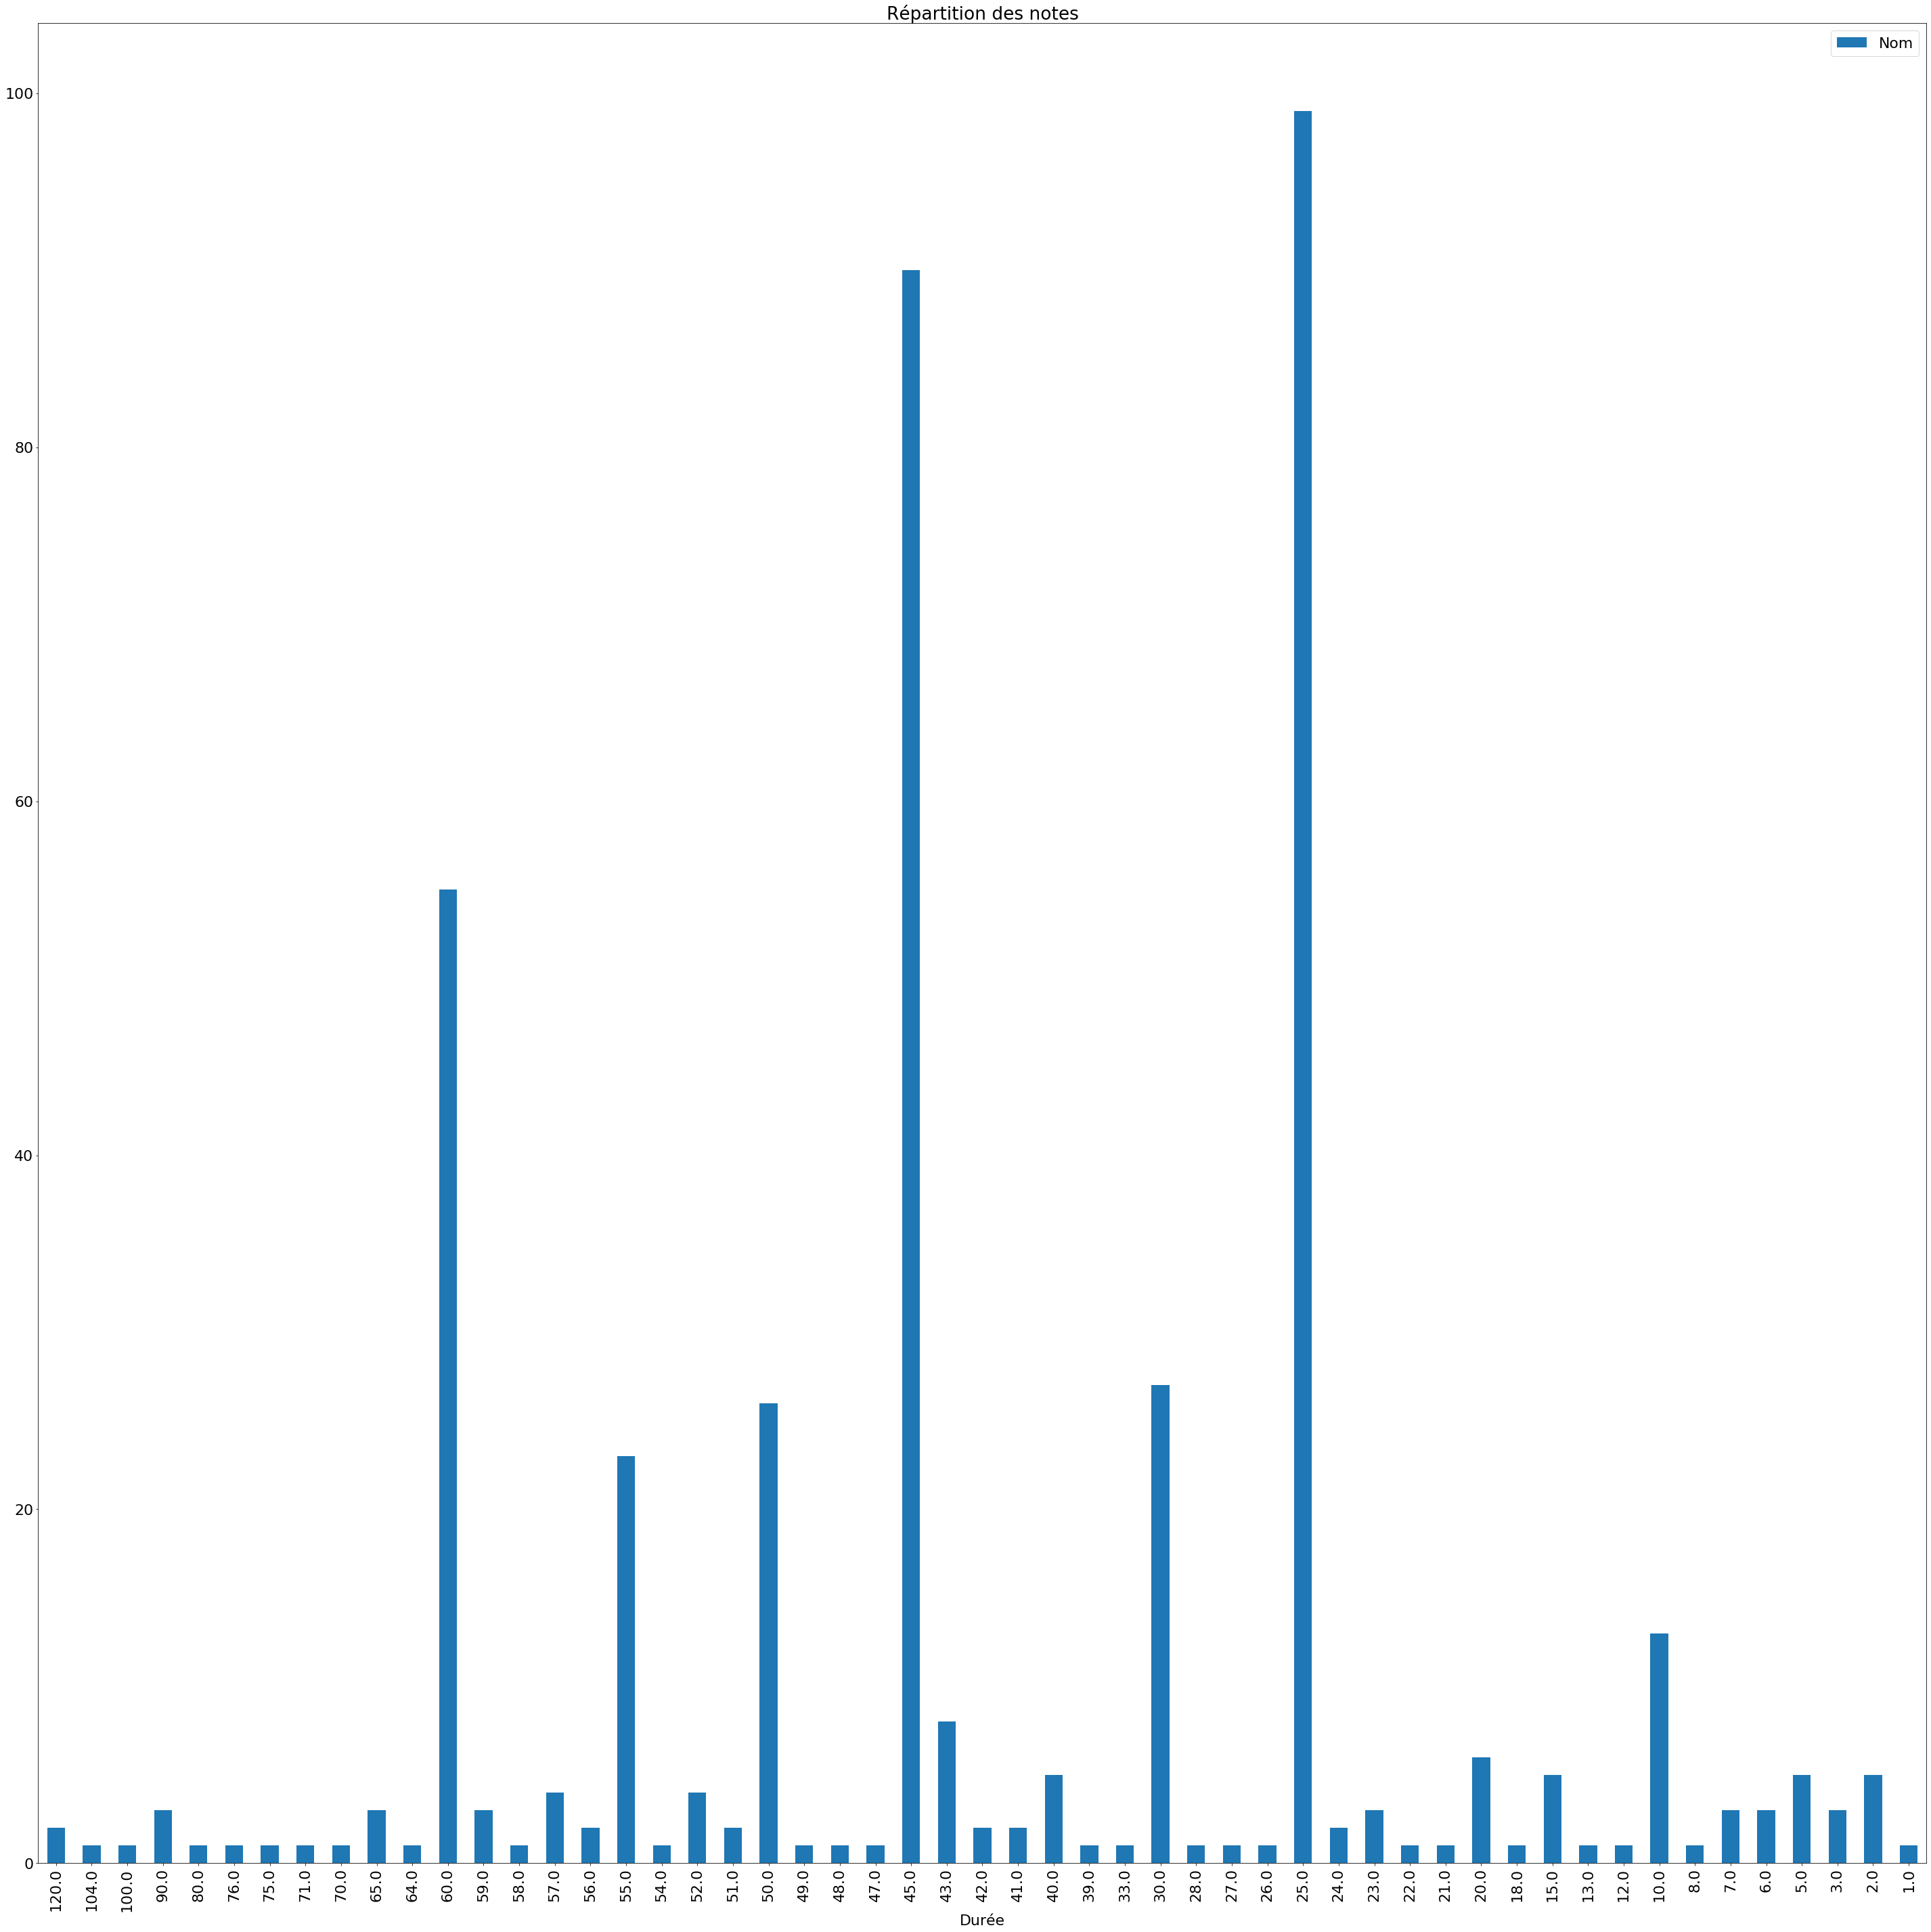

In [11]:
df_series_2=df_series.drop(row_value(df_series,'Durée','Inconnue'))
df_series_2['Durée']=df_series_2['Durée'].astype('float')
df1 = df_series_2.groupby('Durée').agg({'Nom': "count"}).sort_values('Durée', ascending = False)
plt.figure()
plt.rcParams.update({'font.size': 22}) 
df1.plot(kind="bar", figsize = (50,50), title="Répartition des notes")

On voit que les séries ont une durée assez conventionnelle: la grande majorité durent 25, 45 ou 60 minutes.

<Figure size 432x288 with 0 Axes>

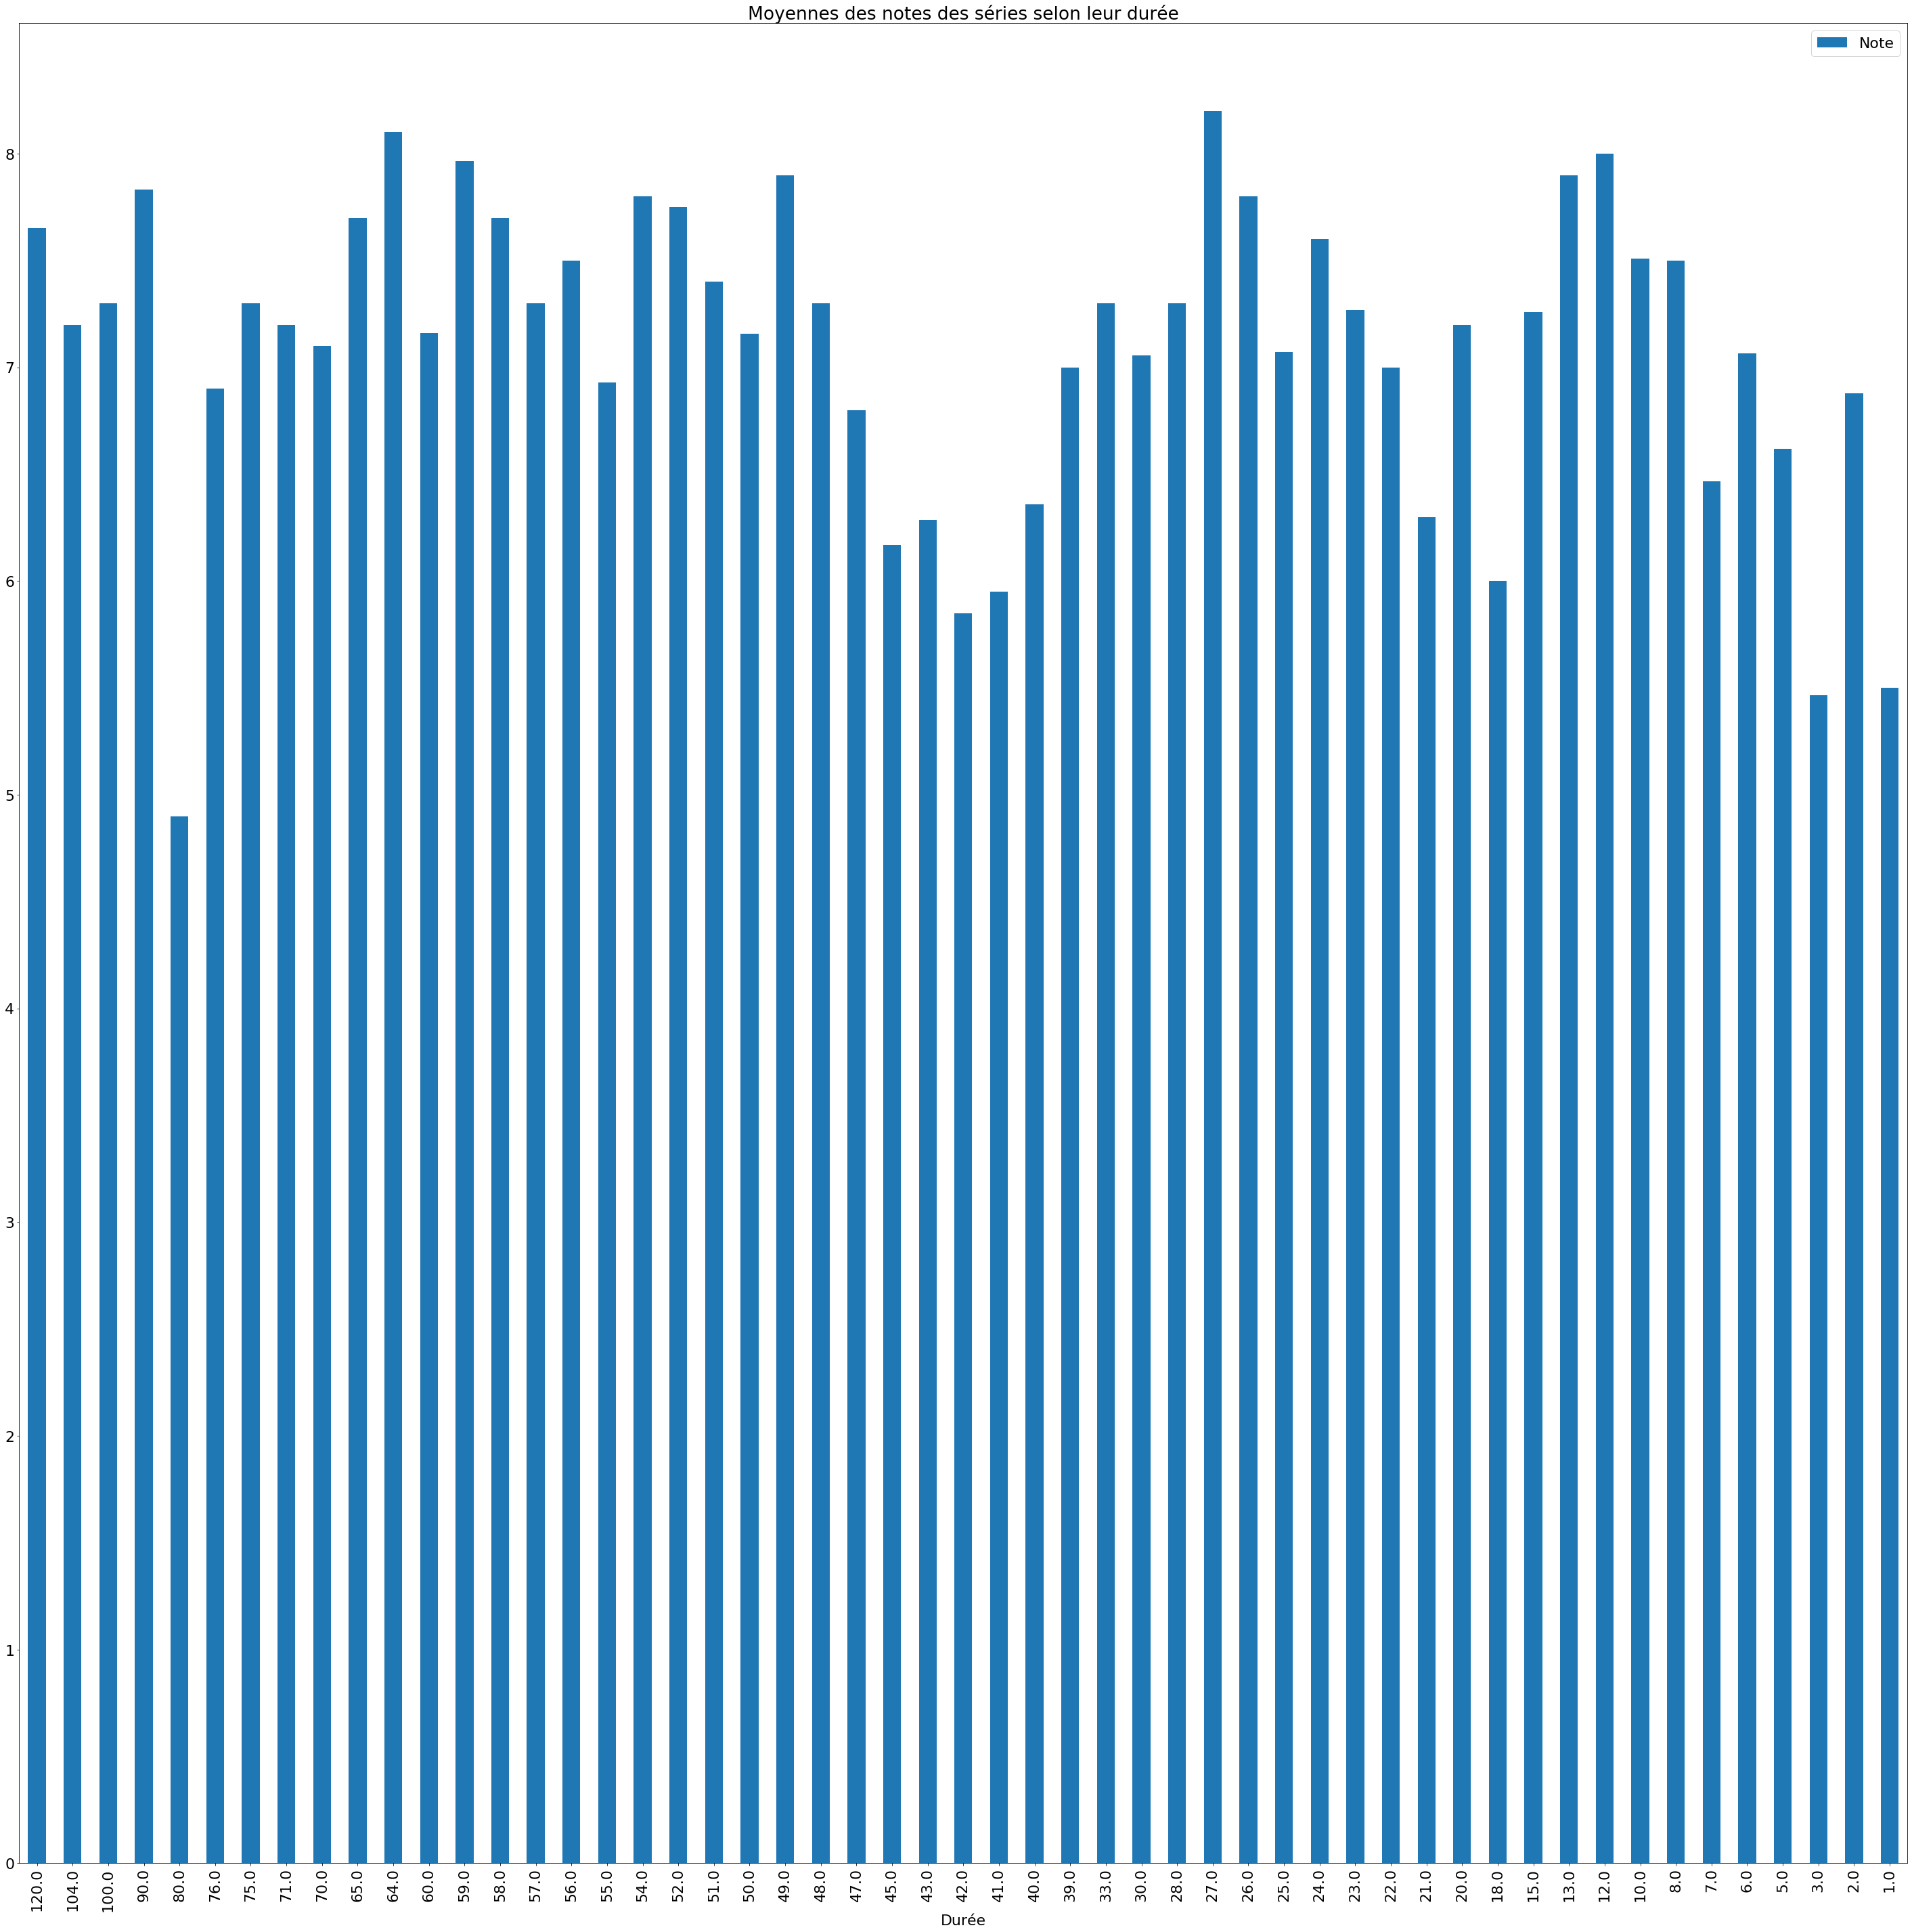

In [12]:
df_series_=df_series.drop(row_value(df_series,'Durée','Inconnue'))
df_series_['Durée']=df_series_['Durée'].astype('float')
df5 = df_series_.groupby('Durée').agg({'Note': "mean"}).sort_values('Durée', ascending = False)
plt.figure()
plt.rcParams.update({'font.size': 22}) 
df5.plot(kind="bar", figsize = (50,50), title="Moyennes des notes des séries selon leur durée")

La note moyenne des séries peut fluctuer selon leur durée, mais il faut relativiser avec le fait que, à l'exception de quelques unes (cf graphe précédent), les échantillons des séries de durée "non-conventionnelle" sont très petits.
Regardons ce que cela donne pour des durées pour lesquelles ont a au moins 20 séries:

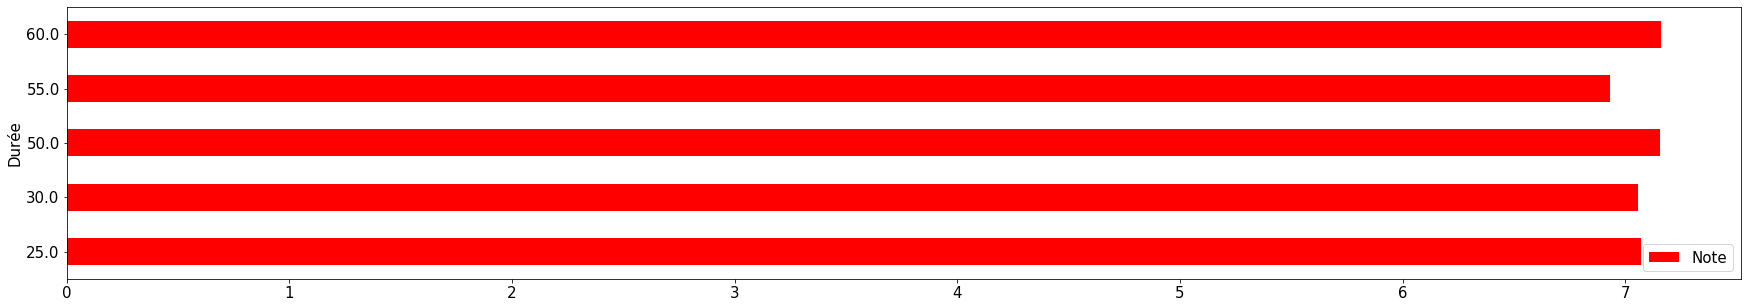

In [44]:
df5.loc[[25.0,30.0,50.0,55.0,60.0],:].plot(kind = "barh", figsize = (30,5), color = 'red')

On voit que ça varie de quelques dixième de points, ce qui peut paraitre assez peu. 

#  Période de diffusion

On passe donc à l'étude de la période de début de diffusion, regardons la distribution des séries selon le mois

<Figure size 432x288 with 0 Axes>

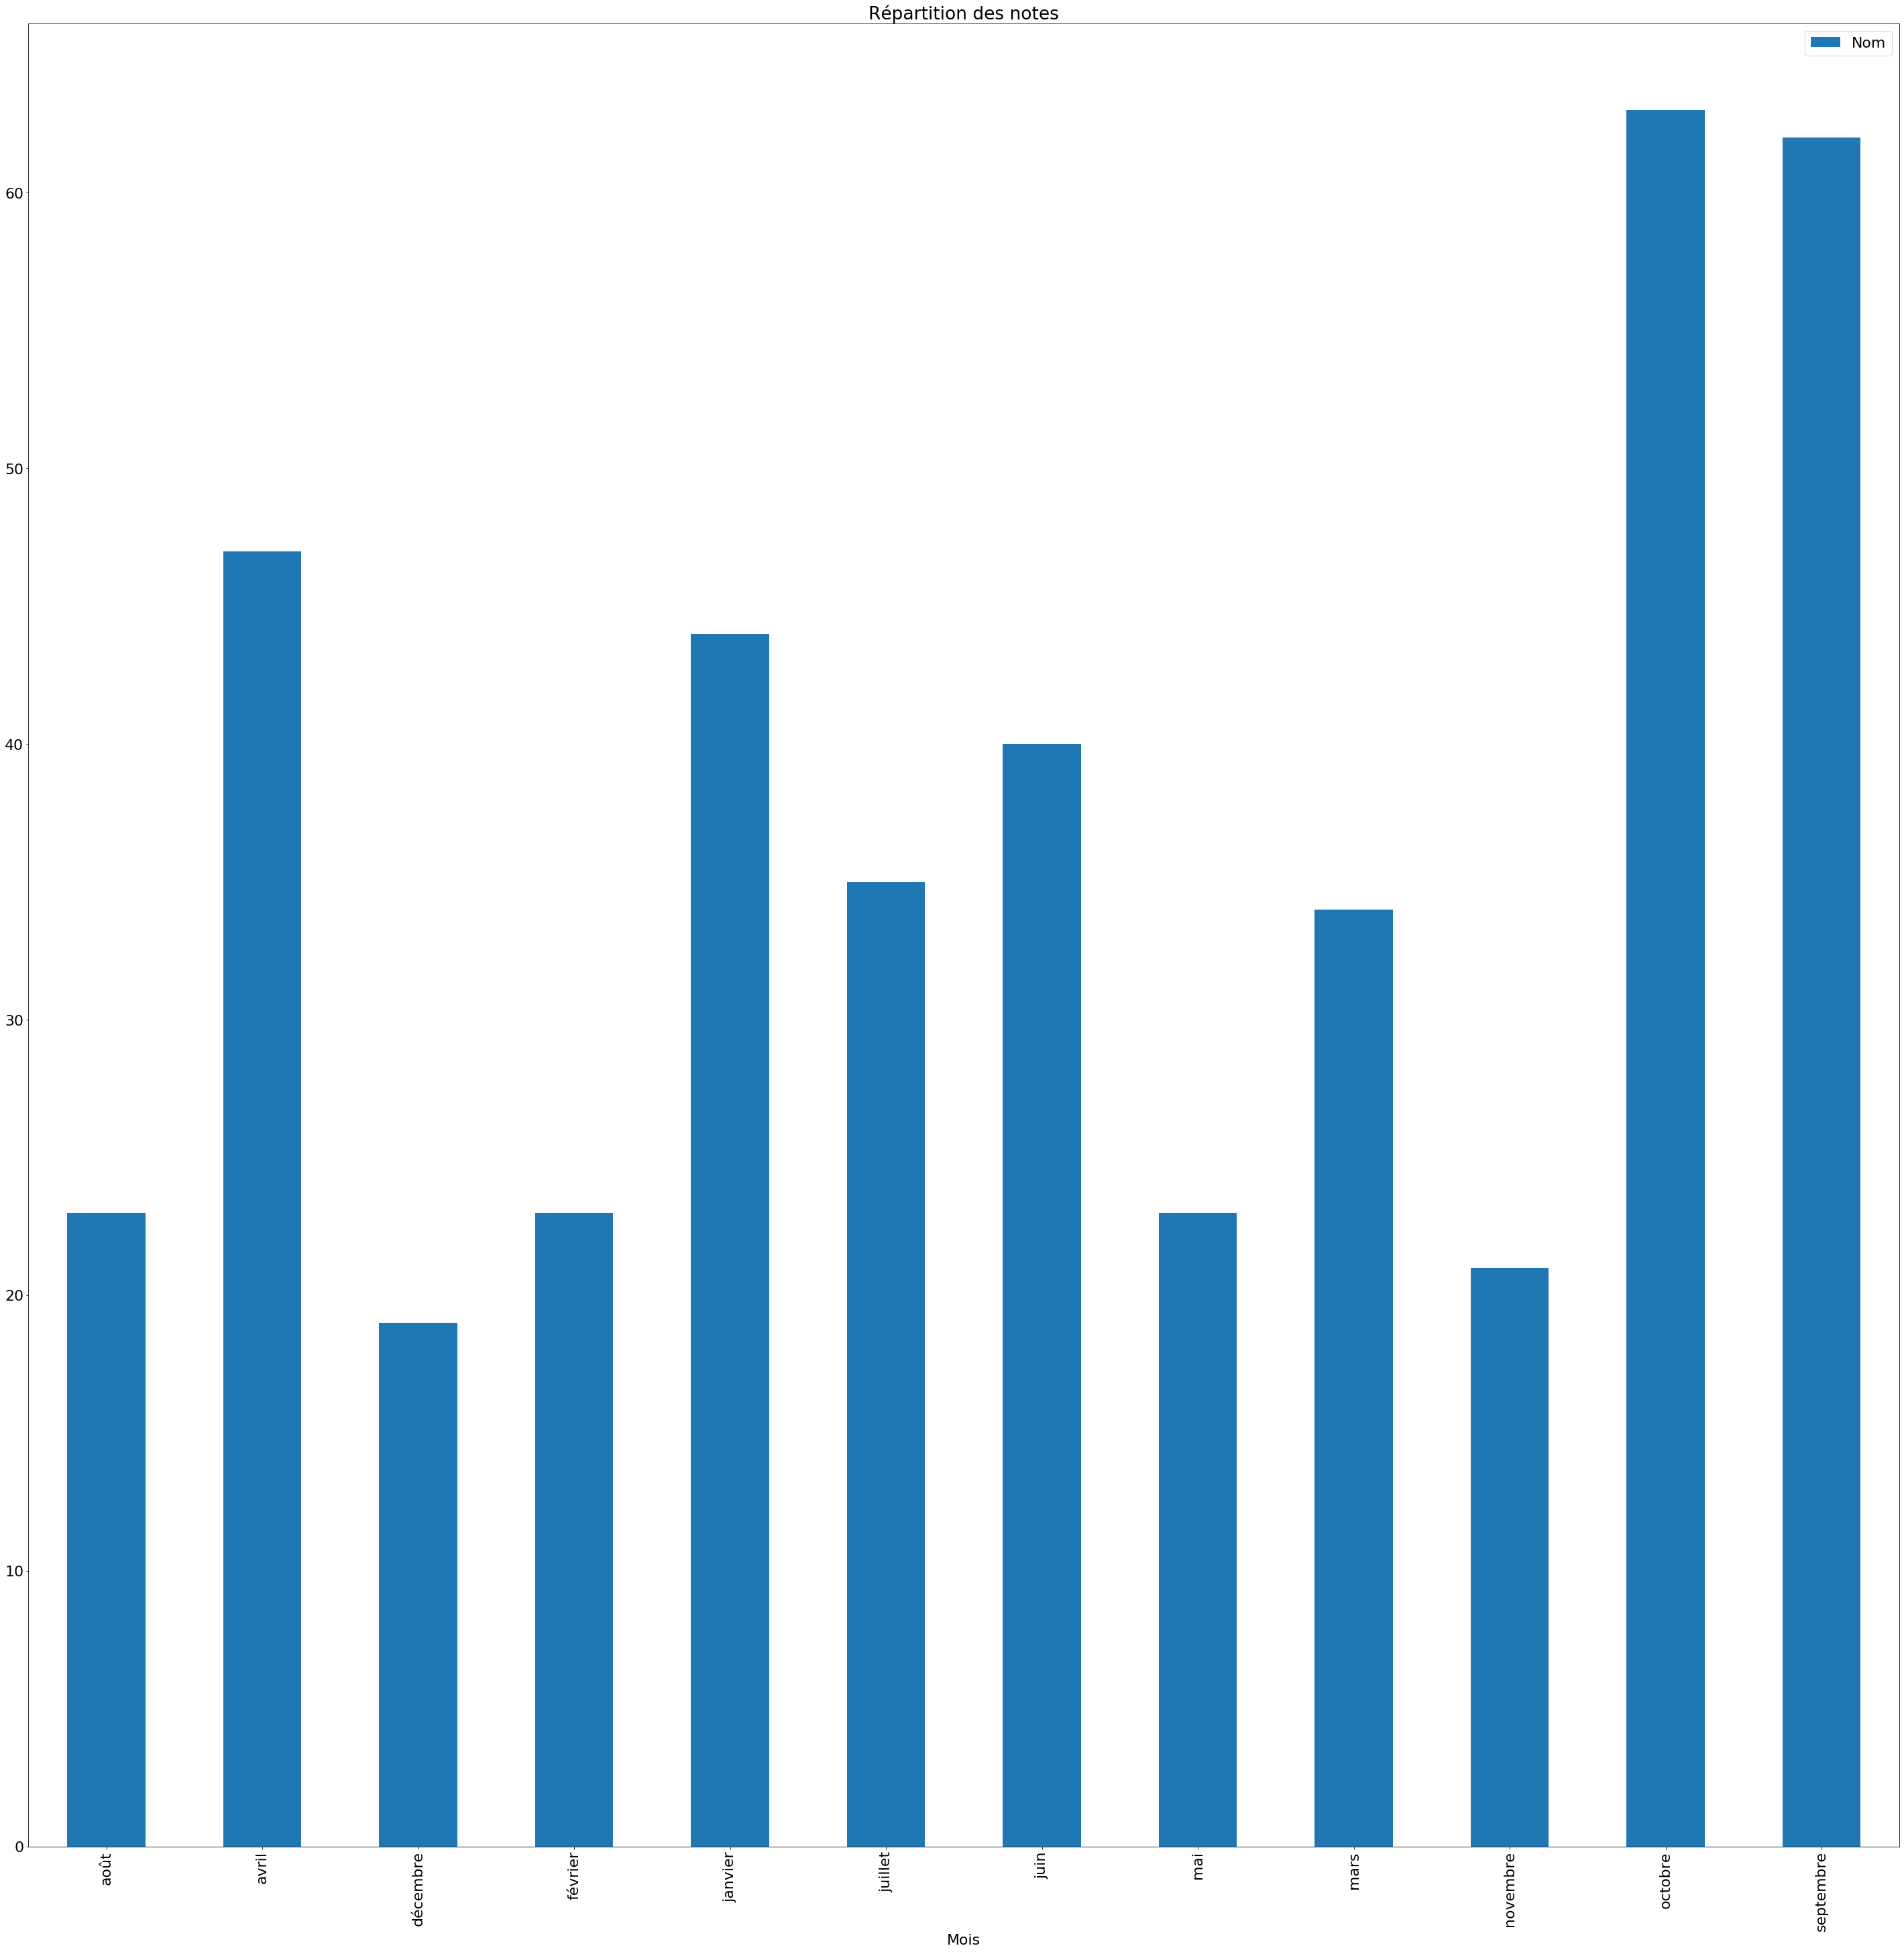

In [14]:
df2 = df_series.groupby('Mois').agg({'Nom': "count"})
plt.figure()
plt.rcParams.update({'font.size': 22})
df2.plot(kind="bar", figsize = (50,50), title="Répartition des notes")

Septembre, octobre et avril apparaissent comme des mois très chargés dans le calendrier des séries. Cependant, celui-ci se divise surtout en saison, on va donc travailler préférablement avec celles-ci.

In [15]:
#on crée une variable saison
def saison(mois):
    if mois in ['mars','avril','mai']:
        return('printemps')
    if mois in ['juin','juillet','août']:
        return('été')
    if mois in ['septembre','octobre','novembre']:
        return('automne')
    if mois in ['décembre','janvier','février']:
        return('hiver')

<Figure size 432x288 with 0 Axes>

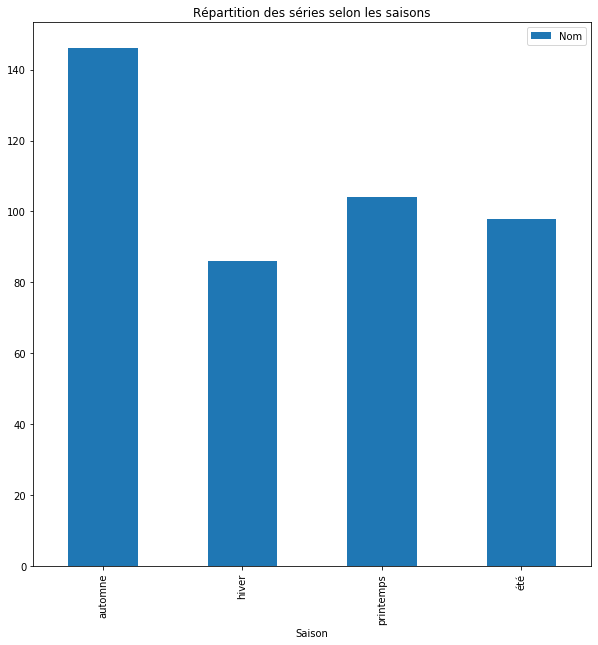

In [16]:
df_series['Saison']=df_series['Mois'].agg(saison)
df3 = df_series.groupby('Saison').agg({'Nom': "count"})
plt.figure()
plt.rcParams.update({'font.size': 10}) 
df3.plot(kind="bar", figsize = (10,10), title="Répartition des séries selon les saisons")

On voit une distribution un peu plus équilibrée avec un creu au niveau de l'hiver: ça peu venir de la "surchage" de sortie en automne. Pour peu qu'une série dure plus de 12 épisodes (avec 1 par semaine), une série sortie en automne débordera un peu sur l'hiver et si les studios n'ont pas les moyens de produire plusieures séries en parallèle, elles évitent de sortir une nouvelle en milieu de l'hiver et préfèrent préparer les séries de printemps et été. 

<Figure size 432x288 with 0 Axes>

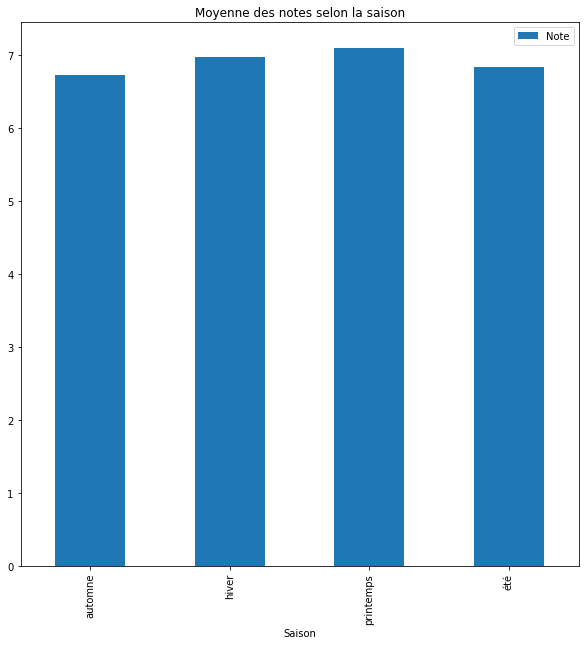

In [17]:
df4 = df_series.groupby('Saison').agg({'Note': "mean"})
plt.figure()
plt.rcParams.update({'font.size': 10}) 
df4.plot(kind="bar", figsize = (10,10), title="Moyenne des notes selon la saison")

De même que pour la durée, on peu voir que la note moyenne ne varie que de quelques dixièmes de points selon la saison. On pourrait faire l'hypothèse que la période de visionnage d'une série par un utilisateur de SensCritique est décorrélée de sa période de diffusion mais cette hypothèse ne peut pas exclure l'influence de cette dernière. En effet, on peut rétorquer qu'avec le débit des séries aujourd'hui, une série sera surtout visionnée lors de sa sortie.

# Pays de diffusion

Passons aux pays de diffusions. Comme on ne les a pas dès le départ, on passe par la plateforme de diffusion indiquée, dont on a la liste ci-dessous:

In [18]:
df_series['Plateforme'].unique()

array(['BBC One', 'AMC', 'HBO', 'ITV', 'Starz', 'FX', 'DR1',
       'DC Universe', 'Fuji TV', 'Allociné', 'Channel 4', 'Direct 8',
       'FOX (US)', 'Comedy Central (US)', 'TNT (US)', 'Cartoon Network',
       'Cinemax', 'SVT', 'Canal+', 'Freeform', 'CBS', 'Disney XD',
       'NTV (JP)', 'AnimeDigitalNetwork', 'Showtime', 'The CW',
       'Inconnue', 'Tokyo Broadcasting System', 'NBC', 'YouTube', 'SyFy',
       'TV Tokyo', 'Paramount Network', 'Tokyo MX', 'BS11',
       'Canal + Family', 'Discovery Family', 'BBC Three', 'TF1', 'Animax',
       'Keshet', 'SBS (KR)', 'Gulli', 'ABC (US)', 'Arte', 'MTV (US)',
       'TV Land', 'téva', 'MBS', 'Global', 'Sky1', 'A&E', 'CBeebies',
       'KBS TV2', 'Showcase (CA)', 'CTC (JA)', 'RTÉ One', 'Netflix',
       'USA Network', 'City', 'BBC Two', 'France 2', 'jeuxvideo.com',
       'ABC (AU)', 'Sky Atlantic (IT)', 'France 5', 'W9', 'Antena 3',
       'tvk', 'TV Aichi', 'PBS', 'Hunan TV', 'TV3 (ES)', 'ReelzChannel',
       'Nickelodeon', 'Sky Arts', 

On crée un dictionnaire avec le pays correspondant et on merge les deux data frames obtenus avec la plateforme comme clé.

In [19]:
pays_plat={'BBC One':'UK', 'AMC':'USA', 'HBO':'USA', 'ITV':'UK', 'Starz':'USA', 'FX':'USA', 'DR1':'Denmark',
       'DC Universe':'USA', 'Fuji TV':'Japan', 'Allociné':'France', 'Channel 4':'UK', 'Direct 8':'France',
       'FOX (US)':'USA', 'Comedy Central (US)':'USA', 'TNT (US)':'USA', 'Cartoon Network':'USA',
       'Cinemax':'USA', 'SVT':'Sweden', 'Canal+':'France', 'Freeform':'USA', 'CBS':'USA', 'Disney XD':'France',
       'NTV (JP)':'Japan', 'AnimeDigitalNetwork':'Japan', 'Showtime':'USA', 'The CW':'USA',
       'Inconnue':'Inconnu', 'Tokyo Broadcasting System':'Japan', 'NBC':'USA', 'YouTube':'USA', 'SyFy':'France',
       'TV Tokyo':'Japan', 'Paramount Network':'USA', 'Tokyo MX':'Japan', 'BS11':'Japan',
       'Canal + Family':'France', 'Discovery Family':'USA', 'BBC Three':'UK', 'TF1':'France', 'Animax':'Japan',
       'Keshet':'Israel', 'SBS (KR)':'Korea', 'Gulli':'France', 'ABC (US)':'USA', 'Arte':'Germany/France', 'MTV (US)':'USA',
       'TV Land':'USA', 'téva':'France', 'MBS':'Japan', 'Global':'USA', 'Sky1':'Croatia', 'A&E':'USA', 'CBeebies':'UK',
       'KBS TV2':'Korea', 'Teletoon':'France', 'Showcase (CA)':'Canada', 'CTC (JA)':'Japan', 'RTÉ One':'Ireland',
       'Netflix':'USA', 'USA Network':'USA', 'City':'Ireland', 'BBC Two':'UK', 'France 2':'France',
       'jeuxvideo.com':'France', 'ABC (AU)':'Australia', 'Sky Atlantic (IT)':'UK', 'France 5':'France', 'W9':'France',
       'Antena 3':'Spain', 'tvk':'Japan', 'TV Aichi':'Japan', 'PBS':'USA', 'Hunan TV':'China', 'TV3 (ES)':'Spain',
       'ReelzChannel':'USA', 'Nickelodeon':'USA', 'Sky Arts':'UK', 'NRK1':'Norway', 'TV Asahi':'Japan',
       'History':'USA', 'France 4':'France', 'Hulu':'USA', 'CMT':'USA', 'Prime Video':'USA', 'D8':'France', 'WOWOW':'Japan',
       'SundanceTV':'USA', 'BBC America':'UK', 'Adult Swim':'USA', 'E4':'UK', 'Lifetime':'USA',
       'Sky Atlantic (UK)':'UK', 'ICI Tou.tv':'Canada', 'OCS':'France', 'ABC Comedy (AU)':'Australia',
       'ITV2':'UK', 'NHK':'Japan', 'Arte Creative':'Germany/France', 'Blackpills':'France', 'Disney+':'USA'}

In [20]:
df_pays= pd.DataFrame.from_dict(pays_plat, orient = 'index', columns = ['Pays'])

In [21]:
#merge 
df_series=df_series.join(df_pays, on='Plateforme')

<Figure size 432x288 with 0 Axes>

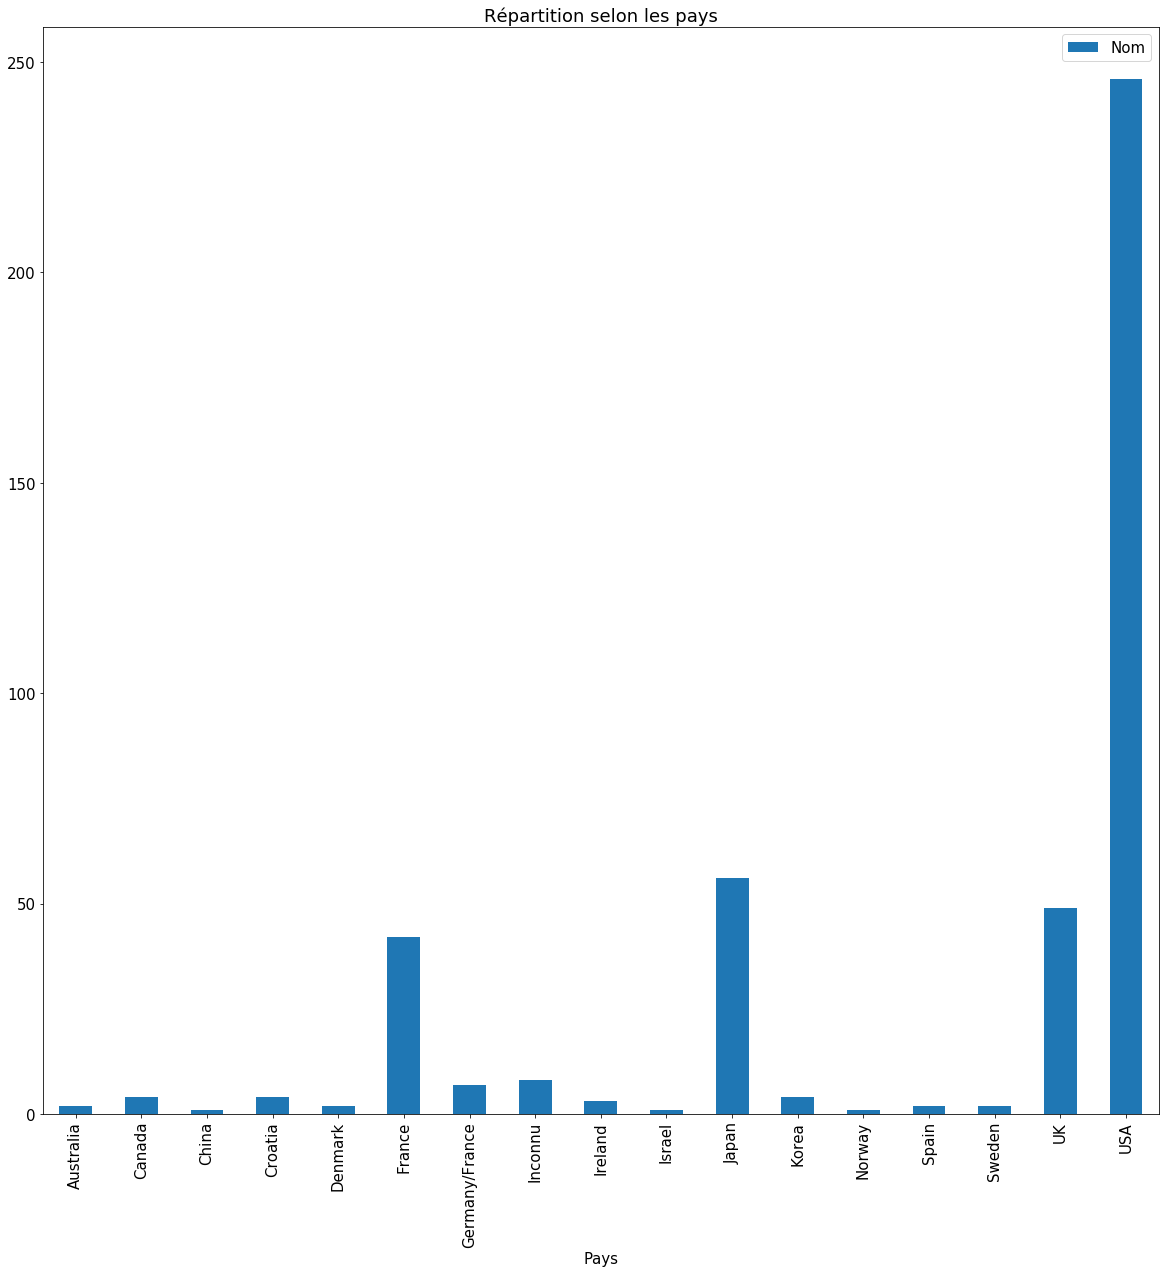

In [22]:
df4 = df_series.groupby('Pays').agg({'Nom': "count"})
plt.figure()
plt.rcParams.update({'font.size': 15}) 
df4.plot(kind="bar", figsize = (20,20), title="Répartition selon les pays")

La répartition se voit un peu mieux avec un camembert 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CB8159DD8>],
      dtype=object)

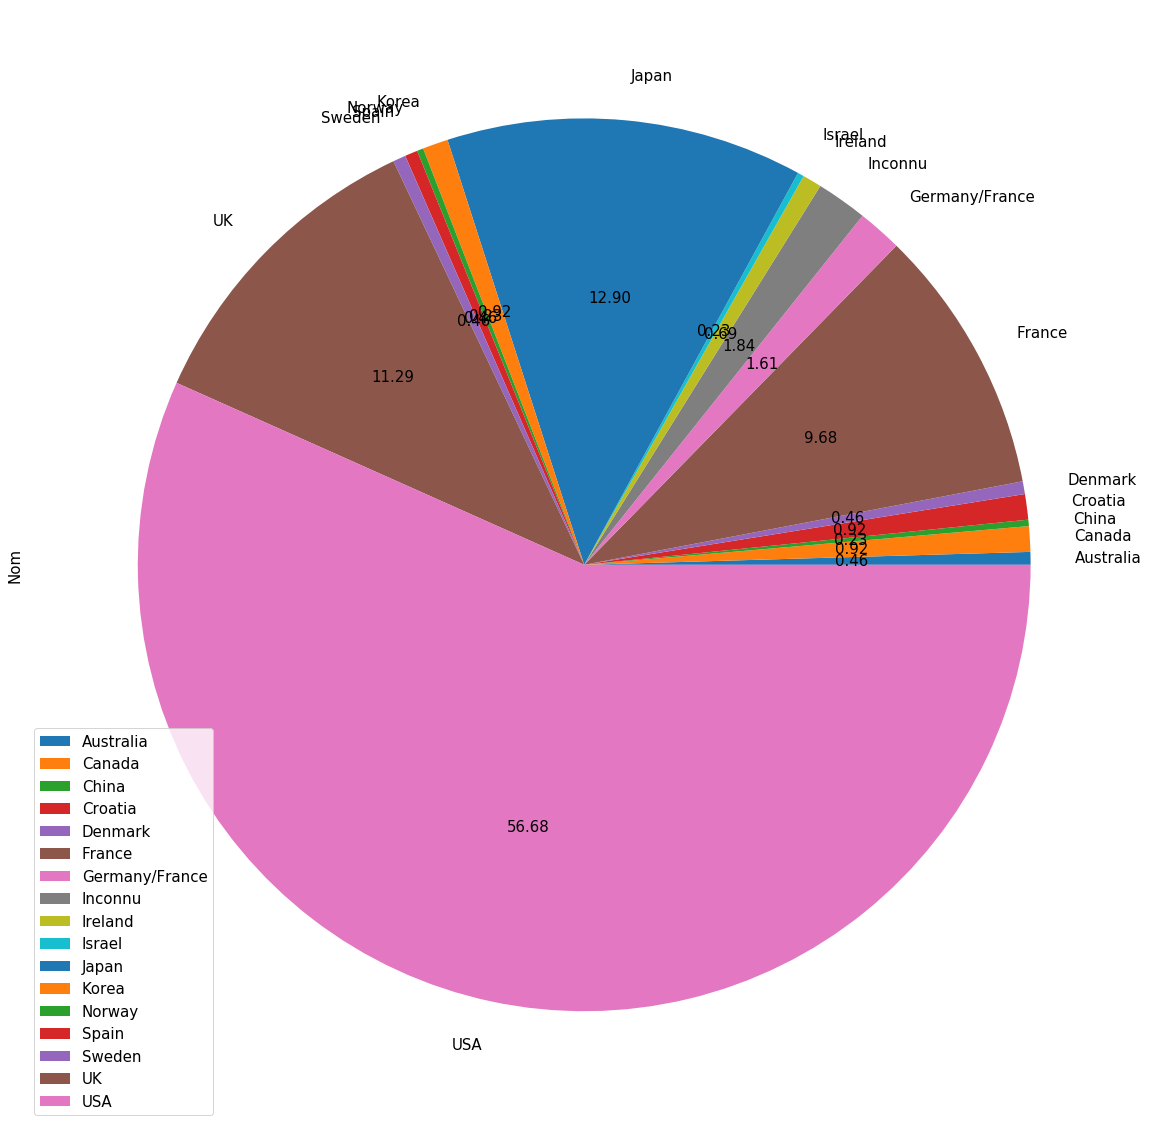

In [23]:
df_series.groupby('Pays').agg({'Nom': "count"}).plot.pie(subplots=True,autopct='%.2f', figsize=(20, 30))

On y voit que les Etat-Unis n'ont pas usurpé leur statut d'hyperpuissance culturelle avec plus de 50% des séries de l'échantillon. Le reste des séries sont majoritairement produite par le Japon (effectivement connu pour son industrie de l'animation), le Royaume Unie et par la France.

Il faut néanmoins savoir relativiser ces chiffres pour deux raisons: 1) SensCritique est un site français et il ne serait pas étonnant que les votants regardent plus des séries françaises ou fassent du chauvinisme pour désigner les 100 meilleures séries 2) Le pays de diffusion n'est pas nécessairement le pays de production: AnimeDigitalNetwork est une société basée en France de diffusion d'animes japonais, par exemple. Ainsi, on ne peut pas généraliser les résultats obtenus en dehors de la base de données dont ils sont issus.

Regardons les 4 pays ayant diffusé le plus grand nombre de séries.

In [24]:
a=df_series.groupby('Pays').agg({'Nom': "count"})
a.sort_values(by=['Nom'],ascending=False)[0:4]

,Nom
Pays,
USA,246
Japan,56
UK,49
France,42


In [25]:
pays_4=['USA','France','Japan', 'UK']
df_series_4=df_series.copy()
df_series_4['pays_4']=df_series_4['Pays'].apply(lambda x: x in pays_4)

In [26]:
#df qui rassemble la note et le pays d'origine des séries diffusées en France, USA, Japon et UK
a=df_series_4[df_series_4['pays_4']].loc[:,['Note','Pays']]
a.reset_index(inplace=True)

In [28]:
L={}
for pays in pays_4:
    l=[]
    for k in range(len(a)):
        if a.loc[k,'Pays'] == pays:
            l.append(a.loc[k,'Note'])
    L[pays]=l

In [53]:
mean_4={}
for pays in pays_4:
    mean_4[pays]=statistics.mean(L[pays])

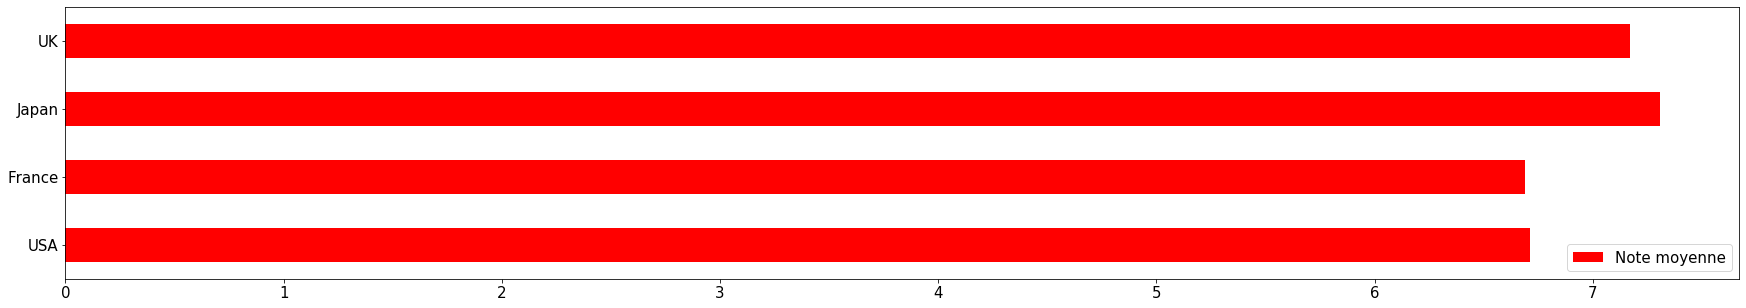

In [56]:
pd.DataFrame.from_dict(mean_4, orient = 'index', columns = ['Note moyenne']).plot(kind = "barh", figsize = (30,5), color = 'red')

On voit que les séries du Japon et de la GB ont tendance à avoir de meilleures notes que celles de la France et des USA. Cependant, il faut voir la distribution des notes pour chaque pays.

Une boite à moustache est assez utile pour cela

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb8787dd8>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb87974a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb8771320>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb8797b38>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb8797e80>],
 'means': []}

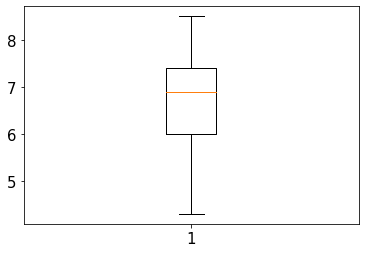

In [29]:
#boite à moustache des séries américaines
plt.boxplot([float(k) for k in L['USA']])

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb87e6f28>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb87cf668>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb87e6b00>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb87cfcf8>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb87cfdd8>],
 'means': []}

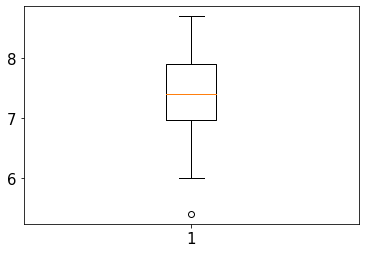

In [30]:
#boite à moustache des séries japonaise
plt.boxplot([float(k) for k in L['Japan']])

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb883fb70>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb88492b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb883f748>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb8849940>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb8849c88>],
 'means': []}

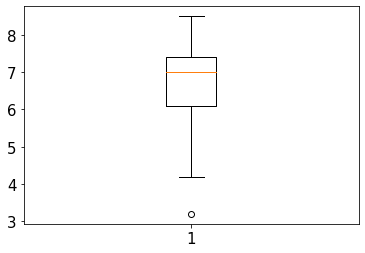

In [31]:
#boite à moustache des séries françaises
plt.boxplot([float(k) for k in L['France']])

{'whiskers': [<matplotlib.lines.Line2D at 0x18cb88a5748>,
 'caps': [<matplotlib.lines.Line2D at 0x18cb88a5e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cb88a5320>],
 'medians': [<matplotlib.lines.Line2D at 0x18cb88ad4e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cb88ad828>],
 'means': []}

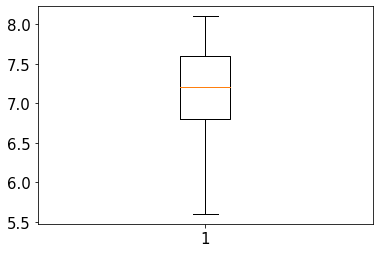

In [32]:
#boite à moustache des séries britanniques
plt.boxplot([float(k) for k in L['UK']])

Les boites à moustaches permettent de contaster que les séries japonaises de ce classement ont une distribution assez resserrée par rapport à celles des autres pays avec (sauf aberration témoignée par le point) une note minimale à un peu plus de 6 et 75% des notes au dessus de 7.

Au contraire, la présence majoritaire des séries américaines dans le classement se reflète sur la distribution des notes qui est assez étalée et dont le premier quartile se situe à 6. La France a également une distribution étendue des notes, et sa boite à moustache ressemble assez à celle des USA.

La boxplot de la GB est un peu à mi-chemin entre celle de la France/USA et celle du Japon.

Ainsi, on voit que la note moyenne de la France et des USA est surtout abaissée à cause d'une queue de distribution des notes étendue vers la gauche.

# Les genres

On cherche à obtenir la liste des genres possibles pour les séries

In [33]:
genres=[]
for k in range(len(df_series)):
    for l in df_series.loc[k,'Genre']:
        if not l in genres:
            genres.append(l)
genres

['policier',
 'drame',
 'thriller',
 'épouvante-horreur',
 'mini-série',
 'guerre',
 'action',
 'historique',
 'aventure',
 'fantasy',
 'comédie',
 'animation',
 'jeunesse',
 'documentaire',
 'dramatique',
 'romance',
 'shōnen',
 'seinen',
 'fantastique',
 'science-fiction',
 'sport',
 'biopic',
 'musique',
 'anthologique',
 'judiciaire',
 'western',
 'médical',
 'télé-réalité']

Comme la variable 'Genre' ne correpond pas à un élément unique de la liste ci-dessus, on va créer pour chacun une variable binaire pour chaque genre: si une série correpond à un genre donné, cette variable vaudra 1, sinon 0.

In [34]:
df_series2=df_series.copy()
for genre in genres:
    df_series2['series_'+genre]=df_series2['Genre'].apply(lambda x: float(genre in x))

In [35]:
df_series2

,Nom,Note,Auteur,Genre,Nombre de saisons,Plateforme,Durée,Date de sortie,Mois,Année,...,series_fantastique,series_science-fiction,series_sport,series_biopic,series_musique,series_anthologique,series_judiciaire,series_western,series_médical,series_télé-réalité
0,Sherlock,8.1,Série de Mark Gatiss et Steven Moffat,"[policier, drame, thriller]",5.0,BBC One,90.0,"['25', 'juillet', '2010']",juillet,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Walking Dead,6.7,Série de Frank Darabont,"[épouvante-horreur, drame]",10.0,AMC,43.0,"['11', 'octobre', '2010']",octobre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Boardwalk Empire,7.6,Série de Terence Winter,[drame],5.0,HBO,60.0,"['19', 'septembre', '2010']",septembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Luther,7.6,Série de Neil Cross,"[policier, drame]",5.0,BBC One,60.0,"['4', 'mai', '2010']",mai,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Band of Brothers : L'enfer du Pacifique,7.5,Série de Bruce McKenna,"[mini-série, drame, guerre]",1.0,HBO,50.0,"['14', 'mars', '2010']",mars,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Downton Abbey,7.6,Série de Julian Fellowes,[drame],6.0,ITV,60.0,"['26', 'septembre', '2010']",septembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Spartacus,6.7,Série de Steven S. DeKnight,"[action, drame, historique]",3.0,Starz,60.0,"['22', 'janvier', '2010']",janvier,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Game of Thrones,8.2,Série de David Benioff et D.B. Weiss,"[aventure, drame, fantasy]",8.0,HBO,52.0,"['5', 'décembre', '2010']",décembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Treme,8.1,Série de David Simon et Eric Overmyer,[drame],4.0,HBO,60.0,"['11', 'avril', '2010']",avril,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Justified,7.2,Série de Graham Yost,"[policier, drame, action]",6.0,FX,45.0,"['16', 'mars', '2010']",mars,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


On regarde le nombre d'apparition de chaque genre dans notre échantillon de séries

Text(0.5, 0, 'Nombre de série comportant ce genre')

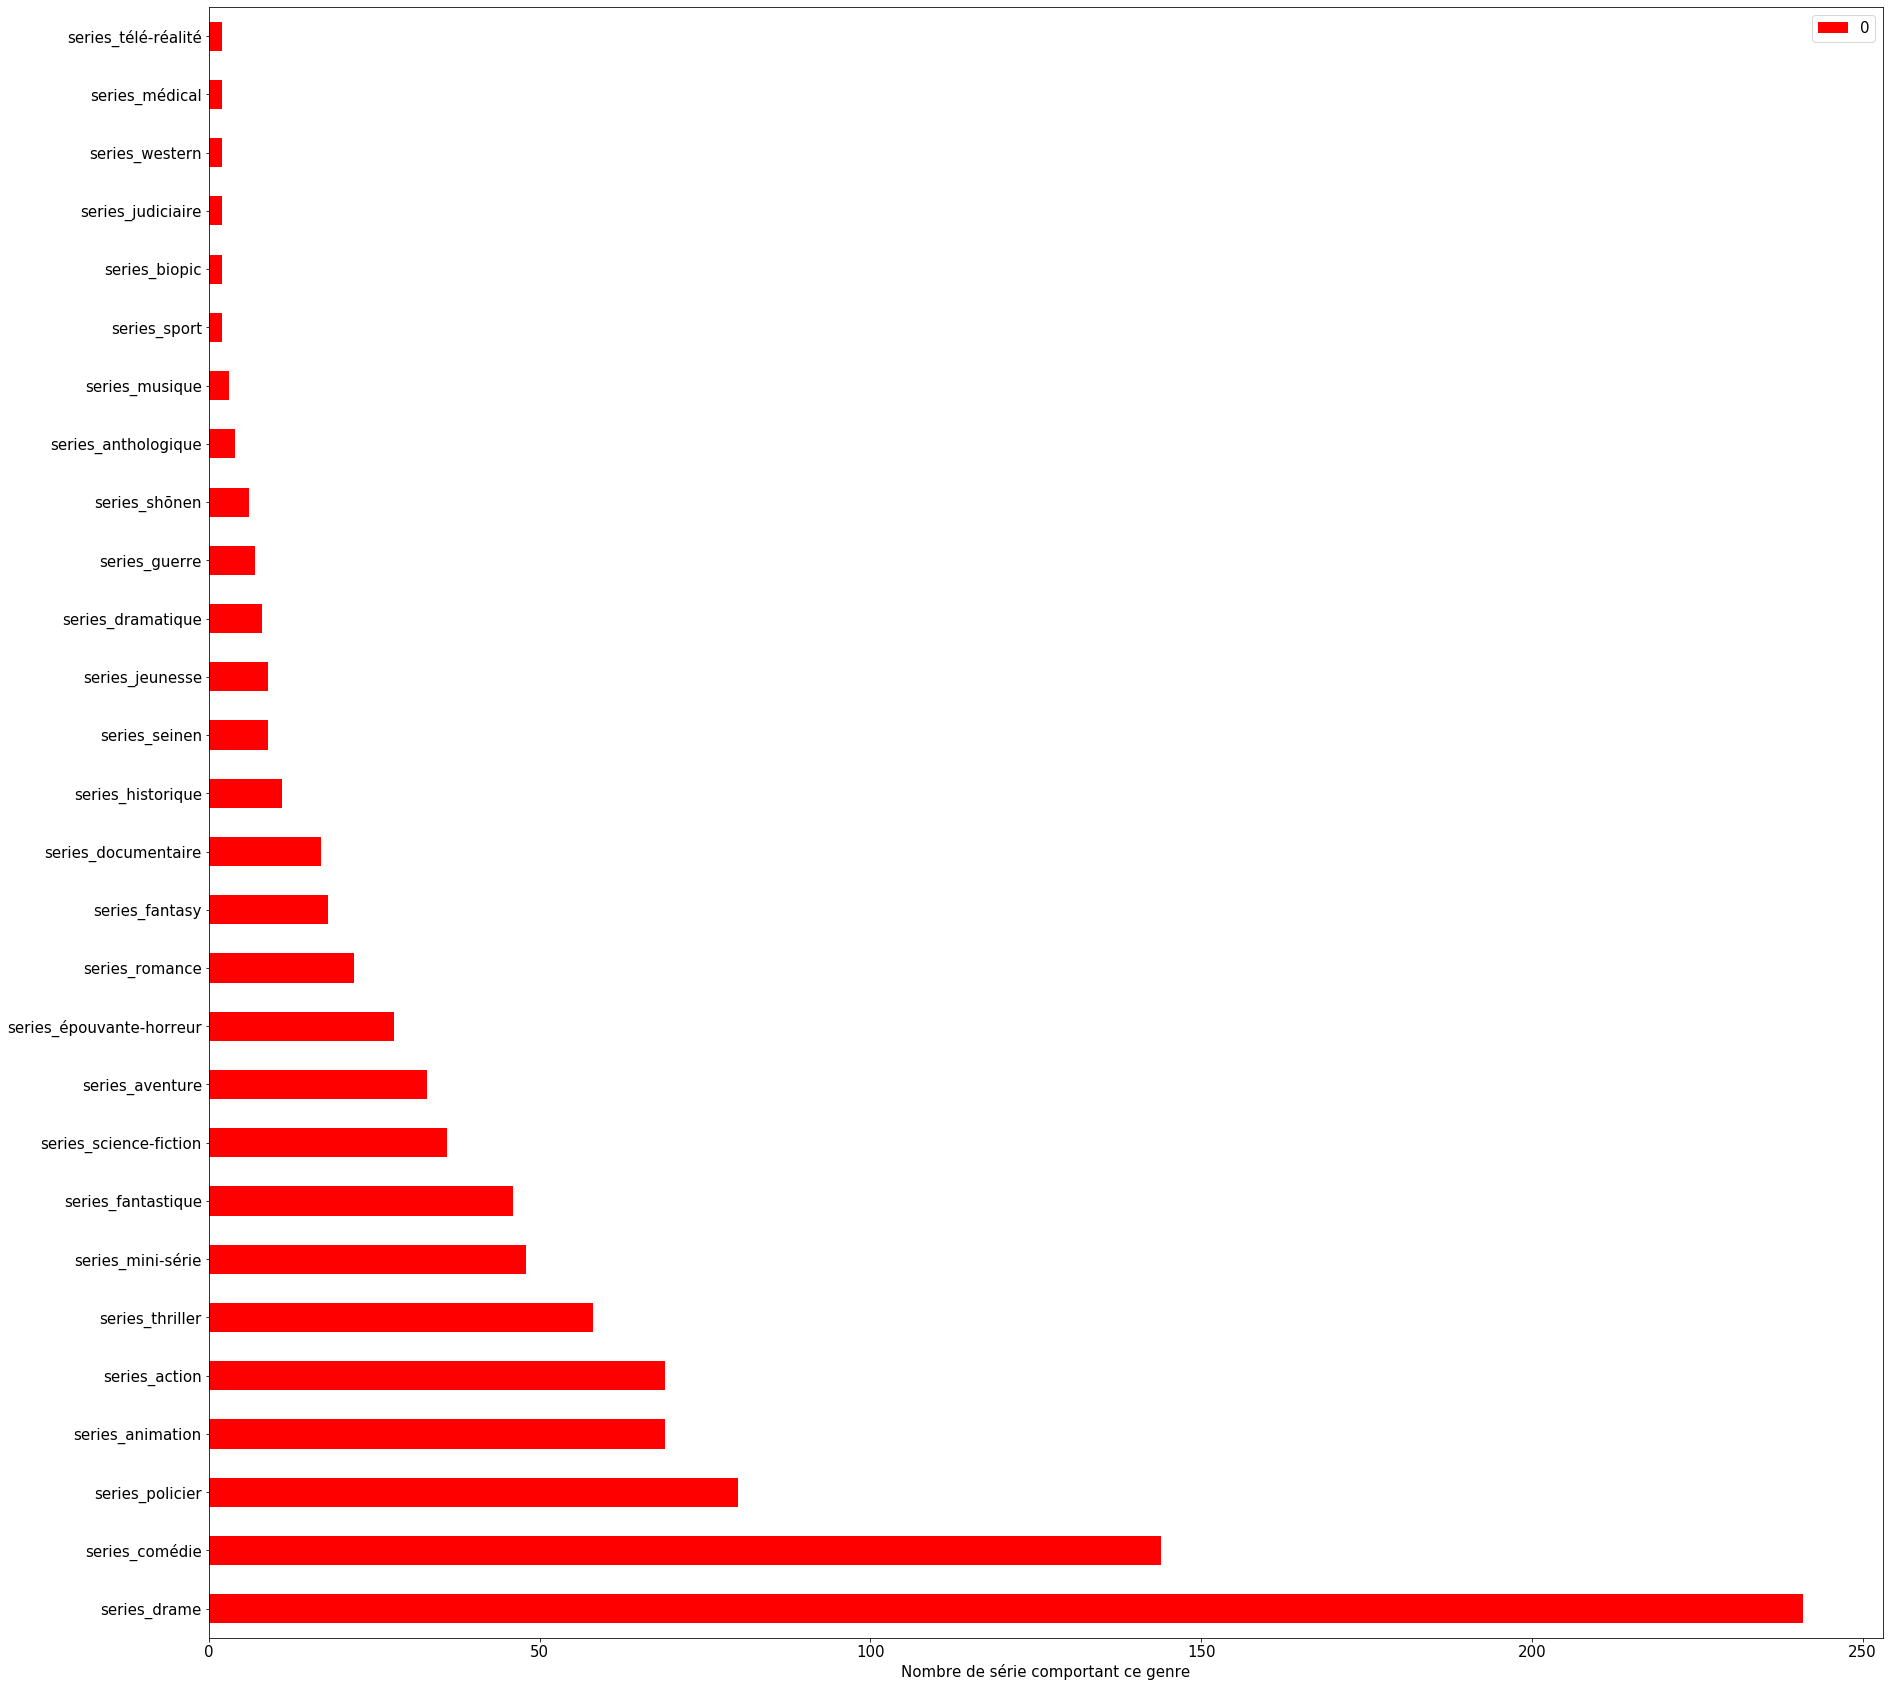

In [84]:
g=df_series2[['series_'+genre for genre in genres]].sum().to_frame()
g.sort_values(by=0, ascending=False).plot(kind = "barh", figsize = (30,30), color = 'red')
plt.xlabel("Nombre de série comportant ce genre")


On peut voir qu'il y a des genres qui reviennent souvent dans la qualification d'une série et d'autres qui sont assez rares. On peut se demander si les genres les plus rares se retrouvent souvent tout seuls:

In [91]:
genres_seul=[]
for k in range(len(df_series)):
    if len(df_series.loc[k,'Genre'])==1:
        if df_series.loc[k,'Genre'][0] not in genres_seul:
            genres_seul.append(df_series.loc[k,'Genre'][0])
genres_seul

['drame',
 'comédie',
 'animation',
 'science-fiction',
 'documentaire',
 'mini-série']

Ce n'est pas le cas, on peut s'en souvenir par la suite si on veut éliminer les genres sous-représentés des variables dans une régression linéaire

Regardons la note moyenne pour chaque genre

In [85]:
#un dictionnaire de sous-df où la clef apparait dans chaque série de son sous-df valeur
df_genres={}
for genre in genres:
    df_genres[genre]=df_series2[df_series2['series_'+genre]==1.0]

In [86]:
genres_moyenne={}
for genre in genres:
    genres_moyenne[genre]=df_genres[genre]['Note'].mean()

([<matplotlib.axis.XTick at 0x18cbb0c1b70>,
 <a list of 28 Text xticklabel objects>)

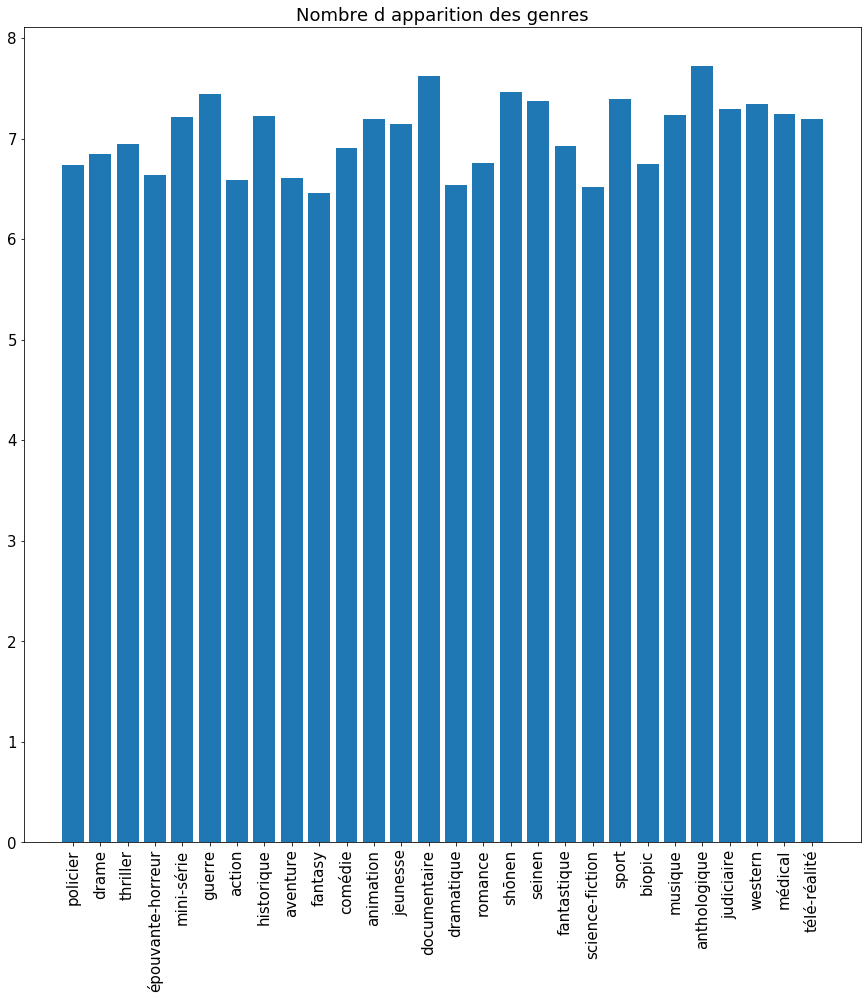

In [87]:
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
plt.title('Moyenne des notes selon le genre')
plt.bar(range(len(genres_moyenne)), list(genres_moyenne.values()), align='center')
plt.xticks(range(len(genres_moyenne)), list(genres_moyenne.keys()))

Là encore on voit une variation de quelques dizaines de points entre les genres. Cependant, il faut faire attention à ce que on ne peut pas prédire la note d'une série en fonction de ce que si un genre est présent ou non mais en fonction de leur combinaison  

Enfin, on va regarder la distribution des notes pour les séries contenant les quatres genres les plus fréquents: le drame, la comédie, le policier et l'animation

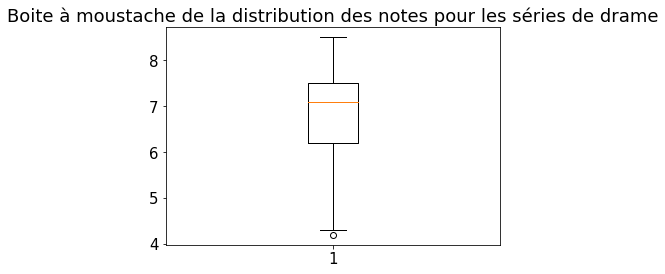

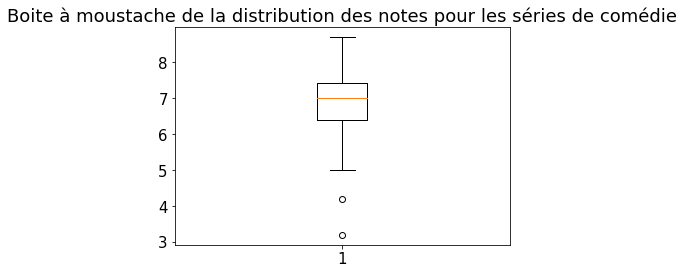

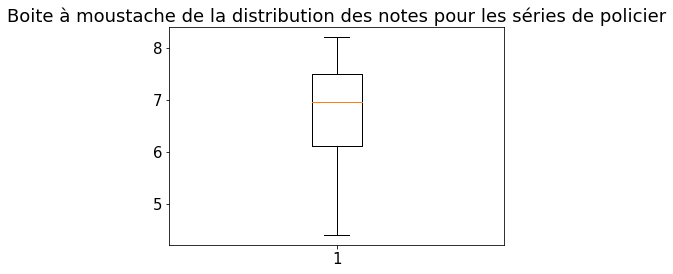

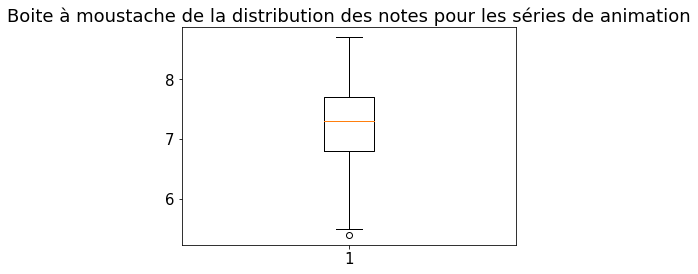

In [92]:
for genre in ['drame','comédie','policier','animation']:
    plt.title('Boite à moustache de la distribution des notes pour les séries de' +' '+ genre)
    box = plt.boxplot(df_genres[genre]['Note'].values.tolist())
    plt.show()
    

Là encore, on s'aperçoit que aucun genre, s'il peut avoir une moyenne de note assez élevée, n'est véritablement déterminant: tous ont une différence note max- note min au moins égale à 3, ce qui est assez gênant si on veut en faire un critère déterminant dans la note.

# Conclusion

Des études statistiques, on conclue que des critères retenus (durée, période de sortie, ect...), on constate que leur variation n'a pas d'impact sur la note au delà de 0.5 points. Pour étudier leur influence, il faudra passer à un modèle de régression linéaire. 

In [42]:
#on exporte sous format csv le df qu'on va utiliser dans la partie régression
df_series2

,Nom,Note,Auteur,Genre,Nombre de saisons,Plateforme,Durée,Date de sortie,Mois,Année,...,series_fantastique,series_science-fiction,series_sport,series_biopic,series_musique,series_anthologique,series_judiciaire,series_western,series_médical,series_télé-réalité
0,Sherlock,8.1,Série de Mark Gatiss et Steven Moffat,"[policier, drame, thriller]",5.0,BBC One,90.0,"['25', 'juillet', '2010']",juillet,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,The Walking Dead,6.7,Série de Frank Darabont,"[épouvante-horreur, drame]",10.0,AMC,43.0,"['11', 'octobre', '2010']",octobre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Boardwalk Empire,7.6,Série de Terence Winter,[drame],5.0,HBO,60.0,"['19', 'septembre', '2010']",septembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Luther,7.6,Série de Neil Cross,"[policier, drame]",5.0,BBC One,60.0,"['4', 'mai', '2010']",mai,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Band of Brothers : L'enfer du Pacifique,7.5,Série de Bruce McKenna,"[mini-série, drame, guerre]",1.0,HBO,50.0,"['14', 'mars', '2010']",mars,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Downton Abbey,7.6,Série de Julian Fellowes,[drame],6.0,ITV,60.0,"['26', 'septembre', '2010']",septembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Spartacus,6.7,Série de Steven S. DeKnight,"[action, drame, historique]",3.0,Starz,60.0,"['22', 'janvier', '2010']",janvier,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Game of Thrones,8.2,Série de David Benioff et D.B. Weiss,"[aventure, drame, fantasy]",8.0,HBO,52.0,"['5', 'décembre', '2010']",décembre,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,Treme,8.1,Série de David Simon et Eric Overmyer,[drame],4.0,HBO,60.0,"['11', 'avril', '2010']",avril,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,Justified,7.2,Série de Graham Yost,"[policier, drame, action]",6.0,FX,45.0,"['16', 'mars', '2010']",mars,2010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
df_series2.to_csv('C:/Users/Jean-Baptiste/OneDrive/ENSAE/projet_python_data_reg.csv')